- (c) Ken-ichi Fukui, 2020/01/17
- MIT License

## Kerasを用いたMINISTデータの識別
- 要Keras, TensorFlowインストール
- Keras: https://keras.io/ja/

In [1]:
%matplotlib inline
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os, struct
import numpy as np

Using TensorFlow backend.


### MNISTデータの読み込み関数

In [2]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
   
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

### MNISTデータの読み込み

In [3]:
current_path = os.path.dirname(os.path.realpath('__file__'))
X_train, y_train = load_mnist(current_path, kind='train')
X_test, y_test = load_mnist(current_path, kind='t10k')

In [4]:
# 学習データとテストデータは最初のn_train_data, n_test_data個用いる
n_training_data = 1000
n_test_data = 1000

X_trn = X_train[:n_training_data][:]
y_trn = y_train[:n_training_data]
X_tst = X_test[:n_test_data][:]
y_tst = y_test[:n_test_data]

# 値の範囲を[0,1]に変換 (Keras用)
X_trn = X_trn.astype('float32')/255
X_tst = X_tst.astype('float32')/255

# One-hot encoderによりクラスラベルをバイナリに変換 (Keras用)
# 例：1 -> [1,0,...,0], 2 -> [0,1,0,...]
y_trn = np_utils.to_categorical(y_trn)
y_tst = np_utils.to_categorical(y_tst)

# 入力データの次元数(=784画素)を取得
n_dim = X_trn.shape[1]

# 出力クラス数(=10クラス)
n_out = y_trn.shape[1]

### 学習履歴をプロットする関数

In [5]:
# Accuracyの履歴のプロット
def plot_history_acc(rec):
    plt.plot(rec.history['acc'],"o-",label="train")
    plt.plot(rec.history['val_acc'],"o-",label="test")
    plt.title('accuracy history')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
    
# 損失関数値の履歴のプロット
def plot_history_loss(rec):
    plt.plot(rec.history['loss'],"o-",label="train",)
    plt.plot(rec.history['val_loss'],"o-",label="test")
    plt.title('loss history')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

### AutoEncoderの構築
- Relu（活性化関数）: f(x) = max(0,x)

In [6]:
ae = Sequential()
ae.add(Dense(500, input_dim = n_dim, activation='relu'))
ae.add(Dropout(0.2))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(125, activation='relu', name = 'encoder'))
ae.add(Dropout(0.5))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(500, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(n_dim, activation='relu'))

# 損失関数にMean Squared Error（平均二乗誤差），　パラメータの最適化にAdamを設定
# Adam(Adaptive moment estimation)は確率的最急降下法の一種． 
ae.compile(loss = 'mse', optimizer ='adam')

# Kerasもfit()で学習を行う． ただし戻り値として学習履歴を返す．
records_ae = ae.fit(X_trn, X_trn,
                    epochs=250,
                    batch_size=200,
                    shuffle=True,
                    validation_data=(X_tst, X_tst))

Train on 1000 samples, validate on 1000 samples
Epoch 1/250
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1009 - val_loss: 0.0934
Epoch 2/250
1000/1000 [==============================] - 0s 430us/step - loss: 0.0828 - val_loss: 0.0871
Epoch 3/250
1000/1000 [==============================] - 1s 582us/step - loss: 0.0735 - val_loss: 0.0809
Epoch 4/250
1000/1000 [==============================] - 0s 446us/step - loss: 0.0700 - val_loss: 0.0821
Epoch 5/250
1000/1000 [==============================] - 0s 429us/step - loss: 0.0684 - val_loss: 0.0788
Epoch 6/250
1000/1000 [==============================] - 0s 434us/step - loss: 0.0677 - val_loss: 0.0792
Epoch 7/250
1000/1000 [==============================] - 1s 531us/step - loss: 0.0670 - val_loss: 0.0755
Epoch 8/250
1000/1000 [==============================] - 0s 460us/step - loss: 0.0665 - val_loss: 0.0754
Epoch 9/250
1000/1000 [==============================] - 0s 435us/step - loss: 0.0660 - val_loss: 0.0741
Epoch 10/

Epoch 78/250
1000/1000 [==============================] - 0s 423us/step - loss: 0.0428 - val_loss: 0.0441
Epoch 79/250
1000/1000 [==============================] - 0s 423us/step - loss: 0.0426 - val_loss: 0.0442
Epoch 80/250
1000/1000 [==============================] - 0s 423us/step - loss: 0.0429 - val_loss: 0.0438
Epoch 81/250
1000/1000 [==============================] - 0s 419us/step - loss: 0.0428 - val_loss: 0.0443
Epoch 82/250
1000/1000 [==============================] - 0s 415us/step - loss: 0.0427 - val_loss: 0.0434
Epoch 83/250
1000/1000 [==============================] - 0s 447us/step - loss: 0.0426 - val_loss: 0.0434
Epoch 84/250
1000/1000 [==============================] - 0s 448us/step - loss: 0.0422 - val_loss: 0.0429
Epoch 85/250
1000/1000 [==============================] - 0s 435us/step - loss: 0.0423 - val_loss: 0.0432
Epoch 86/250
1000/1000 [==============================] - 0s 423us/step - loss: 0.0420 - val_loss: 0.0431
Epoch 87/250
1000/1000 [======================

Epoch 155/250
1000/1000 [==============================] - 0s 393us/step - loss: 0.0373 - val_loss: 0.0387
Epoch 156/250
1000/1000 [==============================] - 0s 412us/step - loss: 0.0370 - val_loss: 0.0380
Epoch 157/250
1000/1000 [==============================] - 0s 403us/step - loss: 0.0373 - val_loss: 0.0382
Epoch 158/250
1000/1000 [==============================] - 0s 430us/step - loss: 0.0373 - val_loss: 0.0383
Epoch 159/250
1000/1000 [==============================] - 0s 391us/step - loss: 0.0372 - val_loss: 0.0386
Epoch 160/250
1000/1000 [==============================] - 0s 465us/step - loss: 0.0371 - val_loss: 0.0383
Epoch 161/250
1000/1000 [==============================] - 0s 466us/step - loss: 0.0365 - val_loss: 0.0381
Epoch 162/250
1000/1000 [==============================] - 0s 394us/step - loss: 0.0369 - val_loss: 0.0384
Epoch 163/250
1000/1000 [==============================] - 0s 377us/step - loss: 0.0368 - val_loss: 0.0381
Epoch 164/250
1000/1000 [============

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
encoder (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_3 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               31500     
__________

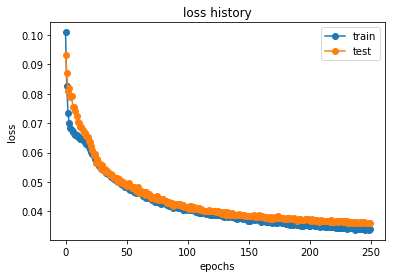

In [7]:
# 学習済み重みの保存
ae.save_weights('autoencoder.h5')
# ネットワークの概要
ae.summary()
# 損失関数値の履歴のプロット
plot_history_loss(records_ae)

### AutoEncoderによる再構成画像の表示

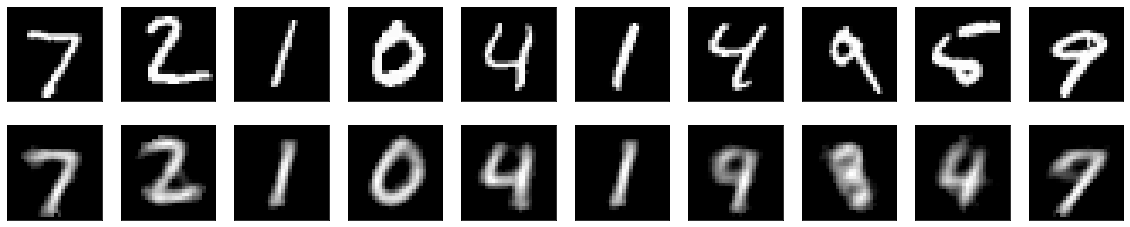

In [8]:
# テスト画像をAutoEncoderで変換
decoded_imgs = ae.predict(X_tst)

n = 10 #表示枚数
plt.figure(figsize=(20, 4))
for i in range(n):
    # 元画像の表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_tst[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 再構成画像の表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoderの学習結果を用いて深層ニューラルネットを構成（DNN）

In [9]:
# AutoEncoderの学習結果（Encoderの学習済み重み）を取得
h = ae.get_layer('encoder').output
# 最終段にクラス数の分の出力を持つsoftmax関数を追加
y = Dense(n_out, activation='softmax', name='predictions')(h)

# 入力から出力層までを繋ぐNNモデルを生成
dnn = Model(inputs=ae.inputs, outputs=y)

# 損失関数は交差エントロピーを使用． 最近は平均二乗誤差ではなく交差エントロピーが用いられている．
dnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

records_dnn = dnn.fit(X_trn, y_trn,
                epochs=50,
                batch_size=200,
                shuffle=True,
                validation_data=(X_tst, y_tst))

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2254 - acc: 0.1390 - val_loss: 2.0903 - val_acc: 0.2880
Epoch 2/50
1000/1000 [==============================] - 0s 182us/step - loss: 1.9624 - acc: 0.3640 - val_loss: 1.8758 - val_acc: 0.4600
Epoch 3/50
1000/1000 [==============================] - 0s 195us/step - loss: 1.6876 - acc: 0.5400 - val_loss: 1.5871 - val_acc: 0.6230
Epoch 4/50
1000/1000 [==============================] - 0s 192us/step - loss: 1.3426 - acc: 0.6760 - val_loss: 1.2660 - val_acc: 0.6790
Epoch 5/50
1000/1000 [==============================] - 0s 188us/step - loss: 1.0289 - acc: 0.7380 - val_loss: 0.9943 - val_acc: 0.7180
Epoch 6/50
1000/1000 [==============================] - 0s 191us/step - loss: 0.7655 - acc: 0.7750 - val_loss: 0.7914 - val_acc: 0.7700
Epoch 7/50
1000/1000 [==============================] - 0s 188us/step - loss: 0.6017 - acc: 0.8090 - val_loss: 0.6772 - val_acc: 0.8070
Ep

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
encoder (Dense)              (None, 125)               31375     
_________________________________________________________________
predictions (Dense)          (None, 10)                1260      
Total para

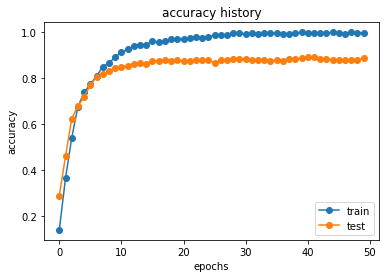

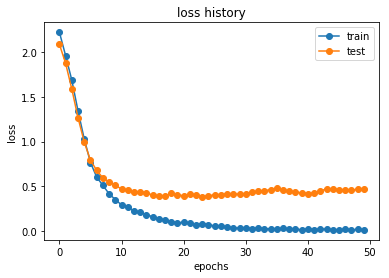

In [10]:
# ネットワークの概要
dnn.summary()
# 学習履歴のプロット
plot_history_acc(records_dnn)
plot_history_loss(records_dnn)

### AutoEncoderを使わない中間層1層の多層パーセプトロン（MLP）

In [11]:
mlp = Sequential()
mlp.add(Dense(500, input_dim = n_dim, activation='sigmoid'))
mlp.add(Dense(n_out, activation='softmax'))
mlp.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['acc'])

records_mlp = mlp.fit(X_trn, y_trn,
                epochs=100,
                batch_size=200,
                validation_data=(X_tst, y_tst))

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2166 - acc: 0.2710 - val_loss: 1.9404 - val_acc: 0.4770
Epoch 2/100
1000/1000 [==============================] - 0s 157us/step - loss: 1.7379 - acc: 0.5580 - val_loss: 1.6317 - val_acc: 0.6330
Epoch 3/100
1000/1000 [==============================] - 0s 123us/step - loss: 1.3794 - acc: 0.7650 - val_loss: 1.3802 - val_acc: 0.6860
Epoch 4/100
1000/1000 [==============================] - 0s 107us/step - loss: 1.1417 - acc: 0.7860 - val_loss: 1.1954 - val_acc: 0.7100
Epoch 5/100
1000/1000 [==============================] - 0s 148us/step - loss: 0.9586 - acc: 0.8030 - val_loss: 1.0655 - val_acc: 0.7420
Epoch 6/100
1000/1000 [==============================] - 0s 148us/step - loss: 0.8277 - acc: 0.8460 - val_loss: 0.9666 - val_acc: 0.7580
Epoch 7/100
1000/1000 [==============================] - 0s 105us/step - loss: 0.7290 - acc: 0.8530 - val_loss: 0.8850 - val_acc: 0.

In [12]:
# ネットワークの概要
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


### CNNを実装
- 参考：VGG-likeなconvnet
- https://keras.io/ja/getting-started/sequential-model-guide/

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 2次元の画像として扱うため28x28x1へ変換
X_trn_cnn = X_trn.reshape(X_trn.shape[0], 28, 28, 1)
X_tst_cnn = X_tst.reshape(X_tst.shape[0], 28, 28, 1)

cnn = Sequential()

In [15]:
# Conv2Dで畳み込み層を設定
# kernel_sizeでフィルタのパッチサイズを指定
# Conv2Dの最初の引数は特徴空間の数
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(Dropout(0.2))
# MaxPooling2Dでプーリング層を設定
# pool_sizeでパッチサイズを指定
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# もう一段同様に畳み込み層とプーリング層を追加
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# Flatten()で2次元の特徴空間を1次元化
cnn.add(Flatten())
# 最後は全結合層を加える
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
# 出力数がクラス数分の出力層
cnn.add(Dense(len(y_trn[0]), activation='softmax'))

In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["acc"])

records_cnn = cnn.fit(X_trn_cnn, y_trn,
                   epochs=100,
                   batch_size=200,
                   shuffle=True,
                   validation_data=(X_tst_cnn, y_tst))

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 2.4496 - acc: 0.0980 - val_loss: 2.2684 - val_acc: 0.3080
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2944 - acc: 0.1500 - val_loss: 2.2456 - val_acc: 0.4080
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.1956 - acc: 0.1950 - val_loss: 2.2203 - val_acc: 0.4860
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.1223 - acc: 0.2590 - val_loss: 2.1796 - val_acc: 0.5650
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.0499 - acc: 0.3220 - val_loss: 2.1085 - val_acc: 0.6120
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.9154 - acc: 0.3510 - val_loss: 1.9953 - val_acc: 0.6380
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7720 - acc: 0.4090 - val_loss: 1.8366 - val_acc: 0.6410
Epoch 8

Epoch 61/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3333 - acc: 0.8950 - val_loss: 0.3746 - val_acc: 0.9300
Epoch 62/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3345 - acc: 0.8920 - val_loss: 0.3585 - val_acc: 0.9340
Epoch 63/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3368 - acc: 0.8960 - val_loss: 0.3481 - val_acc: 0.9380
Epoch 64/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3445 - acc: 0.8900 - val_loss: 0.3470 - val_acc: 0.9360
Epoch 65/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3407 - acc: 0.8960 - val_loss: 0.3525 - val_acc: 0.9300
Epoch 66/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3241 - acc: 0.8980 - val_loss: 0.3470 - val_acc: 0.9390
Epoch 67/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3049 - acc: 0.9070 - val_loss: 0.3406 - val_acc: 0.9360
Epoch 68/100
1000/1000 [========================

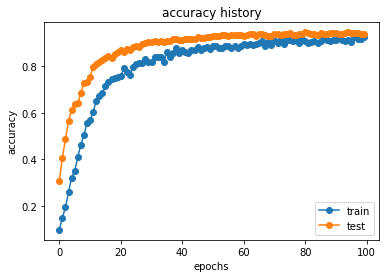

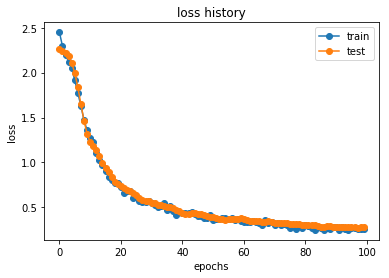

In [17]:
plot_history_acc(records_cnn)
plot_history_loss(records_cnn)

### MLP, DNN, CNNのAccuracyの比較

In [20]:
loss_mlp, acc_mlp = mlp.evaluate(X_tst, y_tst, verbose=0)
loss_dnn, acc_dnn = dnn.evaluate(X_tst, y_tst, verbose=0)
loss_cnn, acc_cnn = cnn.evaluate(X_tst_cnn, y_tst, verbose=0)

print('Test accuracy (MLP):', acc_mlp)
print('Test accuracy (DNN):', acc_dnn)
print('Test accuracy (CNN):', acc_cnn)

Test accuracy (MLP): 0.847
Test accuracy (DNN): 0.887
Test accuracy (CNN): 0.939
